<a href="https://colab.research.google.com/github/sagarrokad1/Speech-Emotion-Recognition/blob/main/Suraj_Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

# **Importing libraries**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

from collections import Counter
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing banking dataset
bank_df= pd.read_csv('/content/bank-full (1).csv',delimiter=';')

In [ ]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#important info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


 **From the above info we cas say that there is no null value in our dataset**

In [ ]:
# some important statistical description of feature in our dataset
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


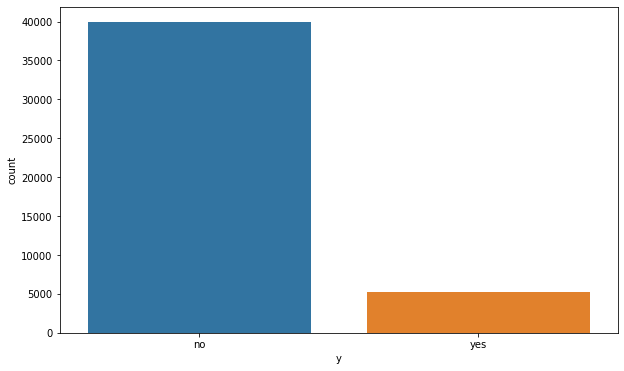

In [ ]:
# visualizing the total no.of client who has subcribed
plt.figure(figsize=(10,6))
sns.countplot(bank_df['y'])
plt.show()

## **From the above count plot we can see that only around 10% has subscribed the term deposit**

# **EDA on Dataset**

In [ ]:
#unique sub attributes of a job column
bank_df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
#value_counts of sub features of job attribute
bank_df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
#converting those categorical columns(default, y) into numeric which have only two different value(yes and no)
LE=LabelEncoder()
bank_df['default']=LE.fit_transform(bank_df['default'])
bank_df['y']=LE.fit_transform(bank_df['y'])
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
bank_df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [ ]:
#creating a list of those columns that contain categorical variable
category_column = list(bank_df.select_dtypes(include=['object']))
category_column

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

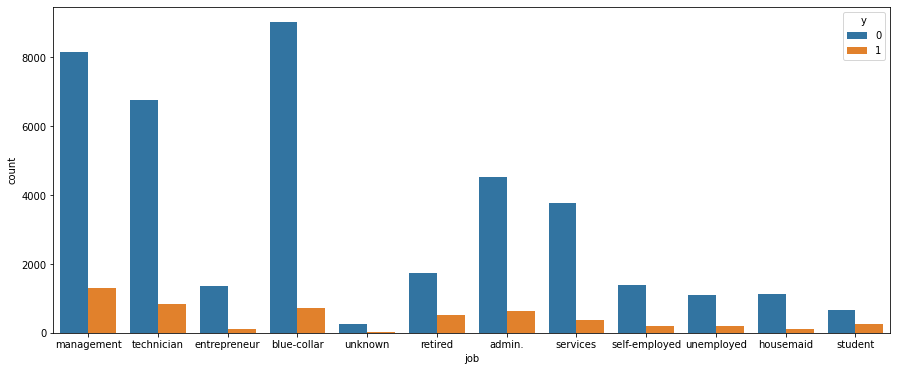

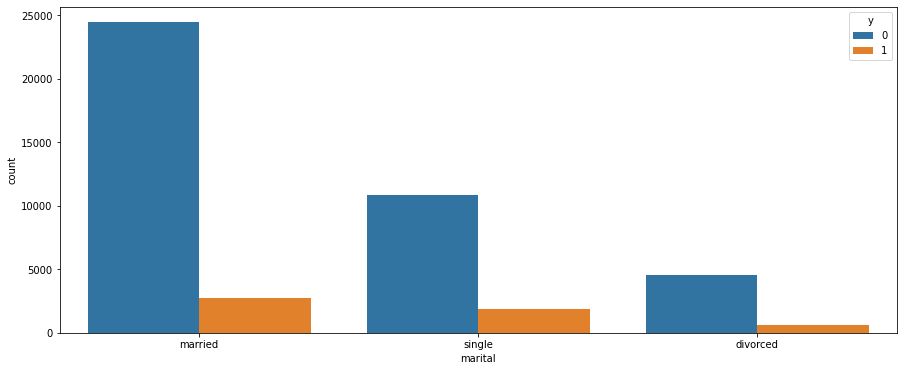

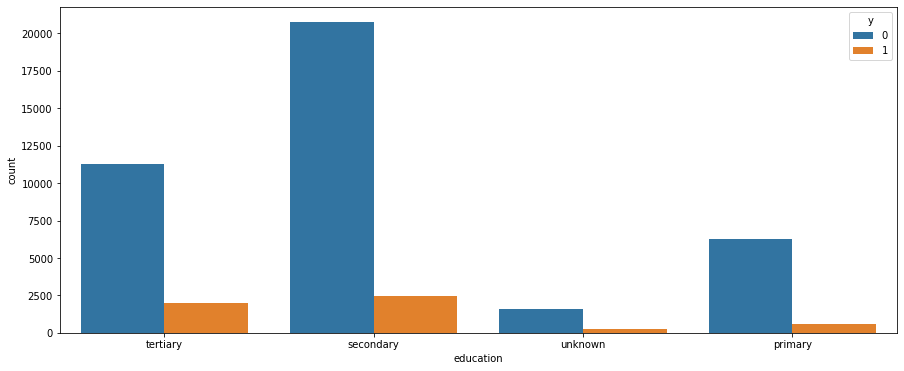

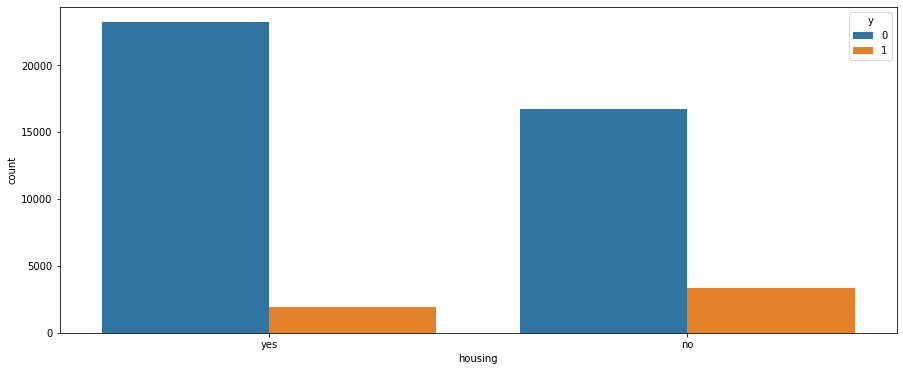

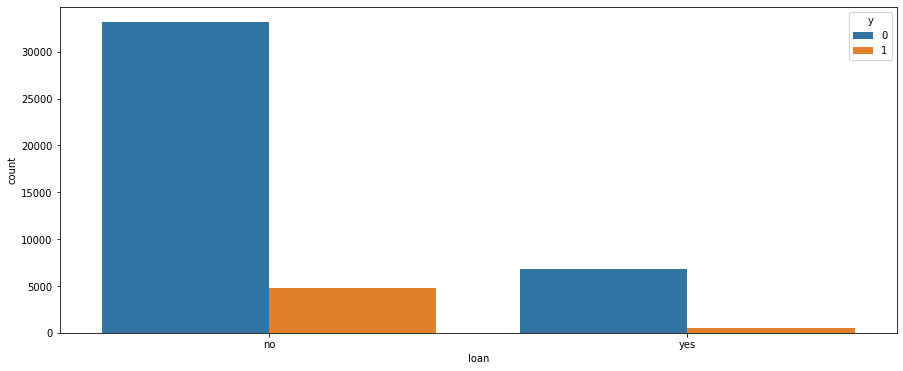

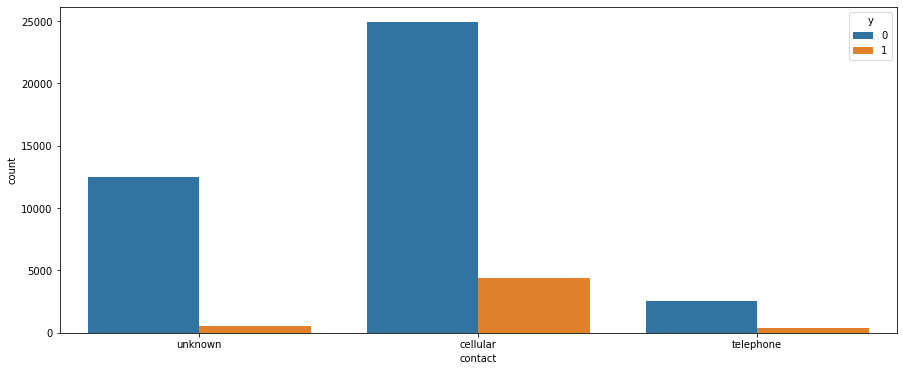

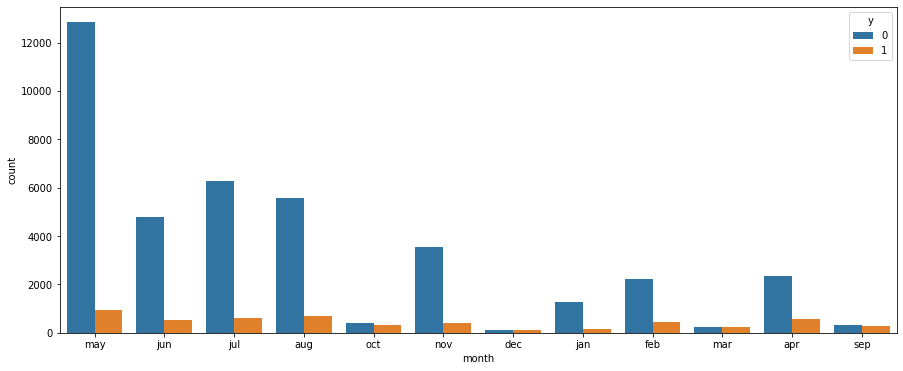

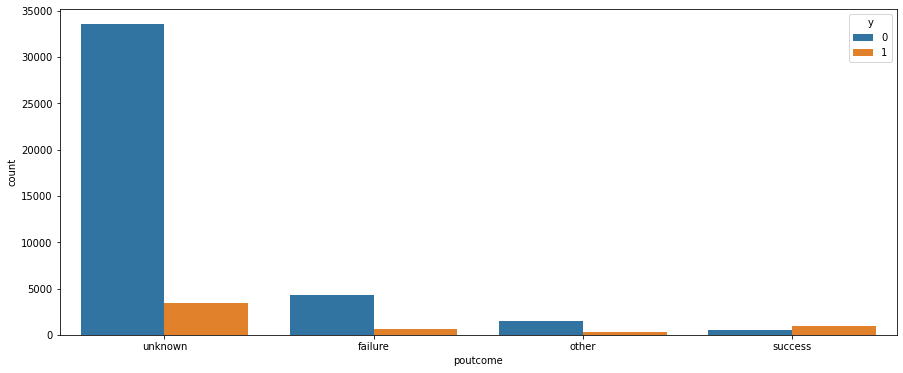

In [ ]:
#term deposit for job,marital,education,housing,loan,contact,month and poutcome
for col in category_column:
  plt.figure(figsize=(15,6))
  sns.countplot(bank_df[col],hue=bank_df['y'])
  plt.show


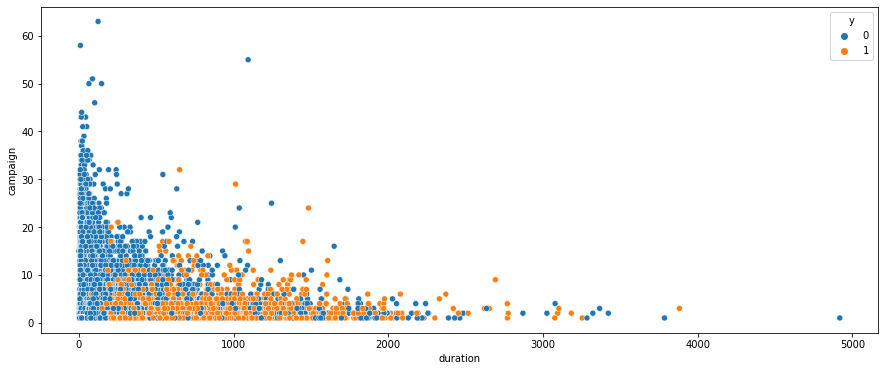

In [ ]:
#scatter plot on duration vs campaign
plt.figure(figsize=(15,6))
sns.scatterplot(x=bank_df['duration'],y=bank_df['campaign'] ,hue=bank_df['y'])
plt.show()

**From the above plot we can see that rate of term deposit increasing as duration of the last call increasing.**

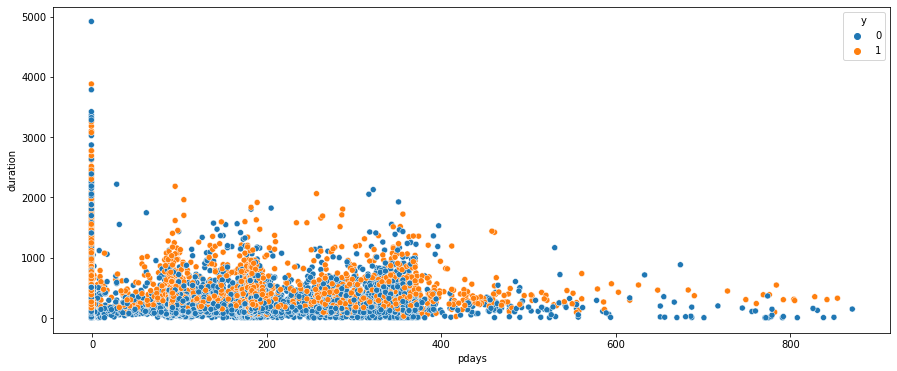

In [ ]:
#scatter plot pdays vs duration
plt.figure(figsize=(15,6))
sns.scatterplot(x=bank_df['pdays'],y=bank_df['duration'] ,hue=bank_df['y'])
plt.show()

**As scatter plot is depicting that most of the client that had been last contacted falls in 0-400(days)**

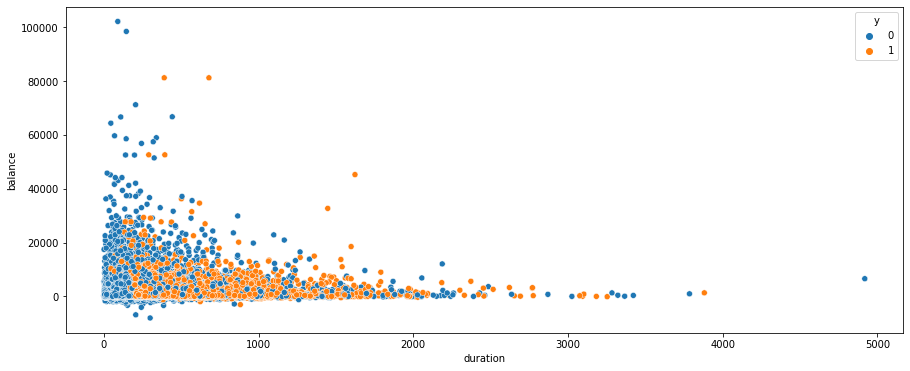

In [ ]:
#duration vs balance
plt.figure(figsize=(15,6))
sns.scatterplot(x=bank_df['duration'],y=bank_df['balance'] ,hue=bank_df['y'])
plt.show()

**Most of the clients who have taken a term deposit do not have very high balance(mostly in between 0-20000)**

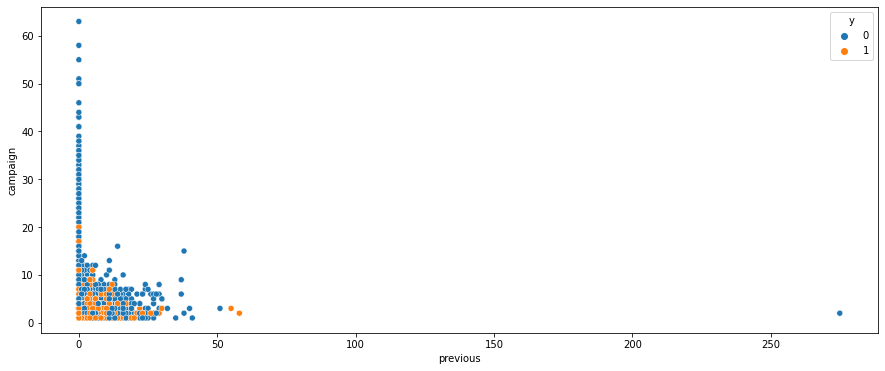

In [ ]:
#previous vs campaign
plt.figure(figsize=(15,6))
sns.scatterplot(x=bank_df['previous'],y=bank_df['campaign'] ,hue=bank_df['y'])
plt.show()

**Most of the clients who have taken a term deposit had been called mostly in b 0-8 times.**

In [ ]:
#no.of calls performed in this campaign
bank_df.groupby('y')['campaign'].mean()

y
0    2.846350
1    2.141047
Name: campaign, dtype: float64

**On average 2 calls leads to success for the clients who have taken a term deposit.**

In [ ]:
#previous calls before campaign
bank_df['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [ ]:
bank_df.groupby('previous')['y'].value_counts().head()

previous  y
0         0    33570
          1     3384
1         0     2189
          1      583
2         0     1650
Name: y, dtype: int64

**From above we can say that most of the folks who have taken a term deposit had not contacted before the campaign.**

# **Data preprocessing**

In [ ]:
category_column = list(bank_df.select_dtypes(include=['object']))
category_column

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
#converting categorical column to numeric by hot encoding
for cols in category_column :
  one_hot = pd.get_dummies(bank_df[cols])
  #Drop column job as it is now encoded
  bank_df = bank_df.drop(cols,axis = 1)
  #Join the encoded df
  bank_df= bank_df.join(one_hot, lsuffix='_',rsuffix='__')

In [ ]:
#new dataset after hot enncoding
bank_df.head()

,age,default,balance,day,duration,campaign,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown_,divorced,married,single,primary,secondary,tertiary,unknown__,no_,yes_,no__,yes__,cellular,telephone,unknown_,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,other,success,unknown__
0,58,0,2143,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,0,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,0,2,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,0,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


**Dataset after hot encoding has been done so that we can convert our some of the categorical columns into numeric.**

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            45211 non-null  int64
 1   default        45211 non-null  int64
 2   balance        45211 non-null  int64
 3   day            45211 non-null  int64
 4   duration       45211 non-null  int64
 5   campaign       45211 non-null  int64
 6   pdays          45211 non-null  int64
 7   previous       45211 non-null  int64
 8   y              45211 non-null  int64
 9   admin.         45211 non-null  uint8
 10  blue-collar    45211 non-null  uint8
 11  entrepreneur   45211 non-null  uint8
 12  housemaid      45211 non-null  uint8
 13  management     45211 non-null  uint8
 14  retired        45211 non-null  uint8
 15  self-employed  45211 non-null  uint8
 16  services       45211 non-null  uint8
 17  student        45211 non-null  uint8
 18  technician     45211 non-null  uint8
 19  unem

**Now ,after hot encoding we have 50 attributes in our banking dataset**

In [ ]:
#In terms of age ,checking the no. of clients who have taken a term deposits.
bank_df.groupby('age')['y'].count().reset_index().head()


,age,y
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


In [ ]:
#taking mean of age attribute 
bank_df.groupby('age')['y'].mean().reset_index().head()


,age,y
0,18,0.583333
1,19,0.314286
2,20,0.300000
3,21,0.278481
4,22,0.310078


**Mean Encoding**

In [ ]:
# doing a mean encoding 
Mean_encoded_subject=bank_df.groupby('age')['y'].mean().to_dict()
bank_df['age']= bank_df['age'].map(Mean_encoded_subject)
bank_df.head()

,age,default,balance,day,duration,campaign,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown_,divorced,married,single,primary,secondary,tertiary,unknown__,no_,yes_,no__,yes__,cellular,telephone,unknown_,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,other,success,unknown__
0,0.097297,0,2143,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.081866,0,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0.106491,0,2,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0.103860,0,1506,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0.106491,0,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


**Age attribute varies a lot and would have been affected our model prediction so we have done a mean encoding so that it can be balanced.**

# **Feature Extraction**

In [ ]:
#checking when the client last contacted
bank_df.groupby('pdays')['y'].value_counts().head()

pdays  y
-1     0    33570
       1     3384
 1     0        9
       1        6
 2     0       35
Name: y, dtype: int64

**In the above cell we have checked when the client last contacted in terms of y attribute and we can see that most of the folks who have taken a term deposit are falling under pdays=-1 which is totally unknown.**

**So we have dropped it due to insufficient information about this pdays attribute.**

In [ ]:
bank_df.drop('pdays',axis=1,inplace=True)
bank_df.drop('day',axis=1,inplace=True)

**We have also dropped day column as it is not making sense.**

In [ ]:
#droping duration attribute
bank_df.drop('duration', axis=1, inplace=True)

**As it is also mentioned above that  this attribute 'Duration' highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.**

**So we dropped this duration attribute.**

In [ ]:
#using standard minmax scaler in balance attribute to standardise our dataset
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0, 1))
bank_df['balance'] = minmax.fit_transform(bank_df['balance'].values.reshape(-1,1))

**Had we been taken a balance attribute as it is it would have been affeted our prediction models in a negative way.**

**So we have used MinMax scaler to standardise the values in this column.**

**FINAL DATASET**

In [ ]:
bank_df.head()

,age,default,balance,campaign,previous,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown_,divorced,married,single,primary,secondary,tertiary,unknown__,no_,yes_,no__,yes__,cellular,telephone,unknown_,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,other,success,unknown__
0,0.097297,0,0.092259,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.081866,0,0.073067,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0.106491,0,0.072822,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0.103860,0,0.086476,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0.106491,0,0.072812,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


**Dataset after standardization**

In [ ]:
#shape of our new dataset
bank_df.shape

(45211, 48)

In [ ]:
bank_df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

**As we talked about this earlier, after seeing this dataset it is quite imbalance. So we really need to to get rid out of it.**

In [ ]:
# Distinguish independent and dependent variables
X = bank_df.drop(['y'], axis=1)
y = bank_df['y']

In [ ]:
#shape of X,y
X.shape,y.shape

((45211, 47), (45211,))

**OVER SAMPLING**

In [ ]:
#importing some library for doing over sample
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
SMote= SMOTETomek(ratio=0.5)
X_res,y_res = SMote.fit_sample(X,y)

**In the above cell, to get rid out of this imbalance data we have done a Over Sampling.**

In [ ]:
#Shape after over sampling
X_res.shape,y_res.shape

((56917, 47), (56917,))

# **Models Implementation**
**1.Logistic Regression**

**2.Random Forest**

**3.K-NN**

**4.Decision Tree**

**5.SGD Classifier** 

**6.Gradient Boosting Classifier**

**7.XGBoost**

**Train-Test Split**

In [ ]:
#Splitting the Dataset inro Train Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

**Splitting the data into train and test to implement various models**

In [ ]:
#importing some important libraries for implementing various models
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from tqdm import tqdm
from sklearn.datasets import make_classification

**Implementing these models with the help of Pipeline:**

**Logistic Regression**

**Random Forest**

**K-NN**

**Decision Tree**

**SGD Classifier**

In [ ]:
'''Build pipline of classifiers'''
# set all CPU
n_jobs = -1
# LogisticRegression
pipe_lr = Pipeline([('lr', LogisticRegression( n_jobs=n_jobs, max_iter=500))])
# RandomForestClassifier
pipe_rf = Pipeline([('rf', RandomForestClassifier(random_state=0, oob_score=True, n_jobs=n_jobs))])
# KNeighborsClassifier
pipe_knn = Pipeline([('knn', KNeighborsClassifier(n_jobs=n_jobs))])
# DecisionTreeClassifier
pipe_dt = Pipeline([('dt', DecisionTreeClassifier(random_state=0, max_features='auto'))])
# SGDClassifier
#pipe_sgd = Pipeline([('sgd', SGDClassifier(random_state=0, n_jobs=n_jobs, max_iter=1500))])
# XG boost Classifier
pipe_xgb=Pipeline([('XGBC',XGBClassifier(n_estimators=500,random_state=0, n_jobs=n_jobs))])

**Using a Pipeline for easing the things**

In [ ]:
'''Set parameters for Grid Search '''
# set number 
cv = StratifiedKFold(shuffle=True, n_splits=5, random_state=0)
# set for LogisticRegression
grid_params_lr = [{
                'lr__penalty': ['l2'],
                'lr__C': [0.3, 0.6, 0.7],
                'lr__solver': ['sag']
                }]
# set for RandomForestClassifier
grid_params_rf = [{
                'rf__criterion': ['entropy'],
                'rf__min_samples_leaf': [3,10],
                'rf__max_depth': [15, 27],
                'rf__min_samples_split': [3, 5],
                'rf__n_estimators' : [300,400]
                }]
# set for KNeighborsClassifier
grid_params_knn = [{'knn__n_neighbors': [16,17,18]}]
# set for DecisionTreeClassifier
grid_params_dt = [{
                'dt__max_depth': [8, 10],
                'dt__min_samples_leaf': [1, 3, 5, 7]
                  }]
# set for SGDClassifier
grid_params_sgd = [{
                   'sgd__loss': ['log', 'huber'],
                    'sgd__learning_rate': ['adaptive'],
                   'sgd__eta0': [0.001, 0.01, 0.1],
                    'sgd__penalty': ['l1', 'l2', 'elasticnet'], 
                    'sgd__alpha':[0.1, 1, 5, 10]
                    }]
             

In [ ]:
'''Grid search objects'''
# for LogisticRegression
gs_lr = GridSearchCV(pipe_lr, param_grid=grid_params_lr,
                     scoring='accuracy', cv=cv) 
# for RandomForestClassifier
gs_rf = GridSearchCV(pipe_rf, param_grid=grid_params_rf,
                     scoring='accuracy', cv=cv)
# for KNeighborsClassifier
gs_knn = GridSearchCV(pipe_knn, param_grid=grid_params_knn,
                     scoring='accuracy', cv=cv)
# for DecisionTreeClassifier
gs_dt = GridSearchCV(pipe_dt, param_grid=grid_params_dt,
                     scoring='accuracy', cv=cv)
#for SGDClassifier
gs_sgd = GridSearchCV(pipe_sgd, param_grid=grid_params_sgd,
                    scoring='accuracy', cv=cv)

In [ ]:
# models that we iterate over
look_for = [gs_lr, gs_rf, gs_knn, gs_dt, gs_sgd]
 #dict for later use 
model_dict = {0:'Logistic_reg', 1:'RandomForest', 2:'Knn', 3:'DesionTree',4:'SGD Class'}

In [ ]:
''' Function to iterate over models and obtain results'''
# set empty dicts and list
result_acc = {}
result_auc = {}

models = []

for index, model in enumerate(look_for):
        
        print()
        print('+++++++ Start New Model ++++++++++++++++++++++')
        print('Estimator is {}'.format(model_dict[index]))
        model.fit(X_train, y_train)
        print('---------------------------------------------')
        print('best params {}'.format(model.best_params_))
        print('best score is {}'.format(model.best_score_))
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
        print('---------------------------------------------')
        print('ROC_AUC is {} and accuracy rate is {}'.format(auc, model.score(X_test, y_test)))
        
        
        print('++++++++ End Model +++++++++++++++++++++++++++')
        print()
        print()
        models.append(model.best_estimator_)
        result_acc[index] = model.best_score_
        result_auc[index] = auc


+++++++ Start New Model ++++++++++++++++++++++
Estimator is Logistic_reg
---------------------------------------------
best params {'lr__C': 0.7, 'lr__penalty': 'l2', 'lr__solver': 'sag'}
best score is 0.7844436829339315
---------------------------------------------
ROC_AUC is 0.7949616269553967 and accuracy rate is 0.7857142857142857
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is RandomForest
---------------------------------------------
best params {'rf__criterion': 'entropy', 'rf__max_depth': 27, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 3, 'rf__n_estimators': 400}
best score is 0.8733565246234469
---------------------------------------------
ROC_AUC is 0.9482342683672562 and accuracy rate is 0.8802727784026997
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is Knn
---------------------------------------------
best params {'knn__n_neighbors': 16}
best 

In [ ]:
""" Model performance during Grid Search """
pd.DataFrame(list(zip(model_dict.values(), result_acc.values(), result_auc.values())), \
                  columns=['Model', 'Accuracy_rate','Roc_auc_rate',])

,Model,Accuracy_rate,Roc_auc_rate
0,Logistic_reg,0.784444,0.794962
1,RandomForest,0.873357,0.948234
2,Knn,0.794591,0.860452
3,DesionTree,0.796841,0.814080
4,SGD Class,0.724684,0.750973


**Performance of some various models in terms of Accuracy_rate and Roc_auc_rate**

**And till now RandomForest is topping the table in terms of Accuracy and AUC.**

**Gradient Boosting**

In [ ]:
#Implementing GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
tr=clf.score(X_train, y_train)
tt=clf.score(X_test,y_test)
y_predicted_test = model.predict(X_test)
print('The train score is',tr)
print('The test score is',tt)
print(classification_report(y_test,y_predicted_test))

The train score is 0.850718286424035
The test score is 0.8517294713160855
              precision    recall  f1-score   support

           0       0.72      0.97      0.83      9660
           1       0.79      0.21      0.34      4564

    accuracy                           0.73     14224
   macro avg       0.76      0.59      0.58     14224
weighted avg       0.74      0.73      0.67     14224



**Gradient Boosting has done very good in terms of but has poor recall**

**XGBoost with RandomizedSearchCV**

In [ ]:
#using XGBoost in RandomizedSearch to get best result
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
folds = 3
param_comb = 5
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}    
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

xgb=XGBClassifier()

#xgb.fit(X_train, y_train)
random_search = RandomizedSearchCV(xgb,param_distributions= prams ,n_iter=param_comb, scoring='roc_auc', n_jobs=4, verbose=3, random_state=1001 )
random_search.fit(X_train, y_train)
y_probs_train = random_search.predict_proba(X_train)
y_probs_test = random_search.predict_proba(X_test)
y_predicted_train = random_search.predict(X_train)
y_predicted_test = random_search.predict(X_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 12.3min finished


**************************************************
Train AUC: 0.964
Test AUC: 0.956
**************************************************
Train Accuracy: 0.925
Test Accuracy: 0.918


<Figure size 648x504 with 0 Axes>

**So XGBoost with RandomizedSearch leading from the front and giving the best performance in copmarision to others**

In [ ]:
print(classification_report(y_test,y_predicted_test))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9660
           1       0.95      0.79      0.86      4564

    accuracy                           0.92     14224
   macro avg       0.93      0.89      0.90     14224
weighted avg       0.92      0.92      0.92     14224



**And what a great score it is giving for Accuracy, Precision, Recall,F1-Score.**

# **Feature Importance**

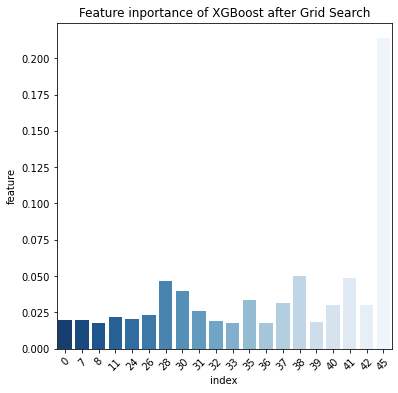

In [ ]:
''' Build bar plot of feature importance of the best model '''

def build_feature_importance(model, X_train, y_train):
    
    models = RandomizedSearchCV(xgb,param_distributions= prams)
    models.fit(X_train, y_train)
    #feature_importances = pd.DataFrame(regressor.feature_importances_,index = dataset.columns,columns=['importance']).sort_values('importance',ascending=False)

    data = pd.DataFrame(models.best_estimator_.feature_importances_, columns=['feature'])
    data = data.sort_values(by='feature', ascending=False).reset_index()
    plt.figure(figsize=[6,6])
    sns.barplot(x='index', y='feature', data=data[:20], palette="Blues_r")
    plt.title('Feature inportance of XGBoost after Grid Search')
    plt.xticks(rotation=45)
    plt.show();
    
build_feature_importance(random_search, X_train, y_train)

In [ ]:
print(X.columns[45])
print(X.columns[38])
print(X.columns[28])
print(X.columns[30])


success
mar
cellular
unknown_


**So after implementing XGboost we can say the most important features that we should focus more on is poutcome(Success) and cellular type clients.**

# **Model Comparision**

In [ ]:
score_dict = {'Model':['Logistic_Reg','RandomForest','Knn','DecisionTree','SGD_Class','Grad_Boost','XGBoost'], 'Train_Accuracy':[0.784443,0.873356,0.794591,0.796840,0.724684,0.850718,0.927457],'Test_Accuracy':[0.784444,0.873357,0.794591,0.796841,0.724684, 0.851729,0.921561],'AUC_Score':[0.794962,0.948234,0.860452,0.814080,0.750973,0.907564,0.956543]} 

In [ ]:
score_df = pd.DataFrame(score_dict) 
score_df

,Model,Train_Accuracy,Test_Accuracy,AUC_Score
0,Logistic_Reg,0.784443,0.784444,0.794962
1,RandomForest,0.873356,0.873357,0.948234
2,Knn,0.794591,0.794591,0.860452
3,DecisionTree,0.796840,0.796841,0.814080
4,SGD_Class,0.724684,0.724684,0.750973
5,Grad_Boost,0.850718,0.851729,0.907564
6,XGBoost,0.927457,0.921561,0.956543


# **Score comparision of different models**

**MODEL** --------------------------**ACCURACY**--------**BIAS**------------   **VARIANCE**

**1.Logistic Regression---NOT GOOD-----HIGH-------------- LOW** 

**2.Random Forest----------   GOOD------- LITTLE------------- LOW**

**3.K-NN --------------------NOT GOOD---- HIGH--------------   LOW**

**4.Decision Tree-----------NOT GOOD----    HIGH--------------  LOW**

**5.SGDC  ----------------------POOR----   VERY HIGH----------  LOW**

**6.Gradient Boosting---------  GOOD   ------LOW --------------  LOW**

**7.XGBoost  ----------------VERY GOOD--  VERY LOW---------  LOW**










# **XGBoost Classifier is the best model to implement with low Bias and low Variance**

# **CONCLUSION** 
**The most important attributes that should be focussed is** 

**1.poutcome: outcome of the previous marketing campaign in which success was made.**
                                                                             **So basically those clients who had taken the product in the last campaign should be focussed more as they have high probability of taking term deposit.**

**2.Those who have Cellurar contact communication type are in very high probability of taking term deposit.**

**3.Most of the folks who have taken the term deposit had been talked last time in month of March,which is not making sense techniqually.But we can say that it may be due to March month is last month of financial year.**

**4.XGBoost is showing the best Accuracy,Precision,Recall and very good Train and Test score with Low BIAS and Low VARIANCE.**

# **HOPE IT HELPS**   
#             ***THANKYOU***